In [2]:
!pip install wfdb
import wfdb
import csv
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.stats
from IPython.display import display
from scipy.signal import butter, lfilter
from scipy.signal import freqs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.2 MB/s eta 0:00:00


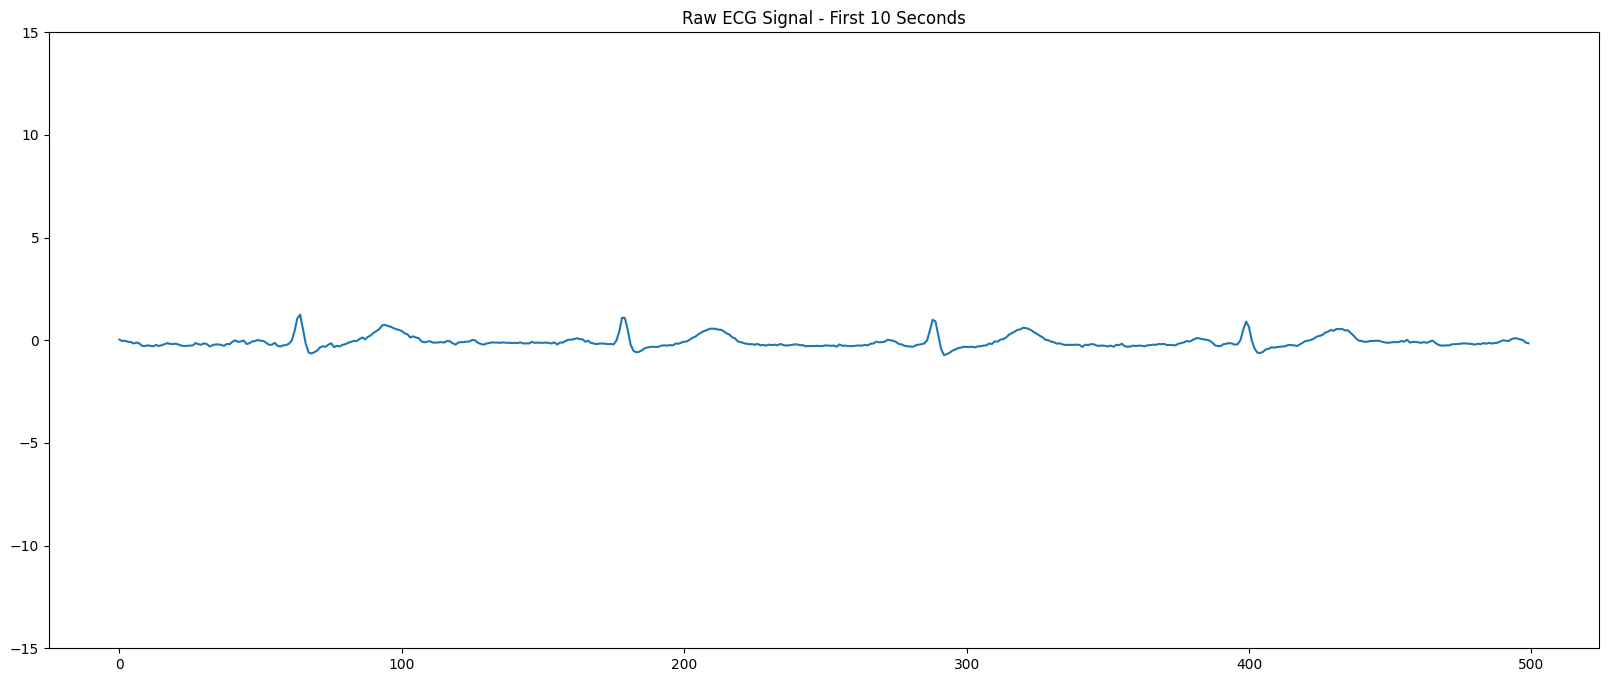

In [7]:


# Set the path to your dataset files without the extension
record_name = '/content/drive/MyDrive/Colab Notebooks/ecg_files/100'

# Read the header file
record = wfdb.rdrecord(record_name)
patient_number = record.record_name
leads = record.sig_name
ecg_data = record.p_signal
ecg_frequency = record.fs

x = ecg_data[:, 0]
num_samples_per_10_seconds = ecg_frequency * 20
x_10_seconds = x[189500+num_samples_per_10_seconds:190000+num_samples_per_10_seconds]

plt.figure(figsize=(20, 8))
plt.title('Raw ECG Signal - First 10 Seconds')

plt.plot(x_10_seconds)
plt.ylim(-15, 15)
plt.show()

x = x_10_seconds

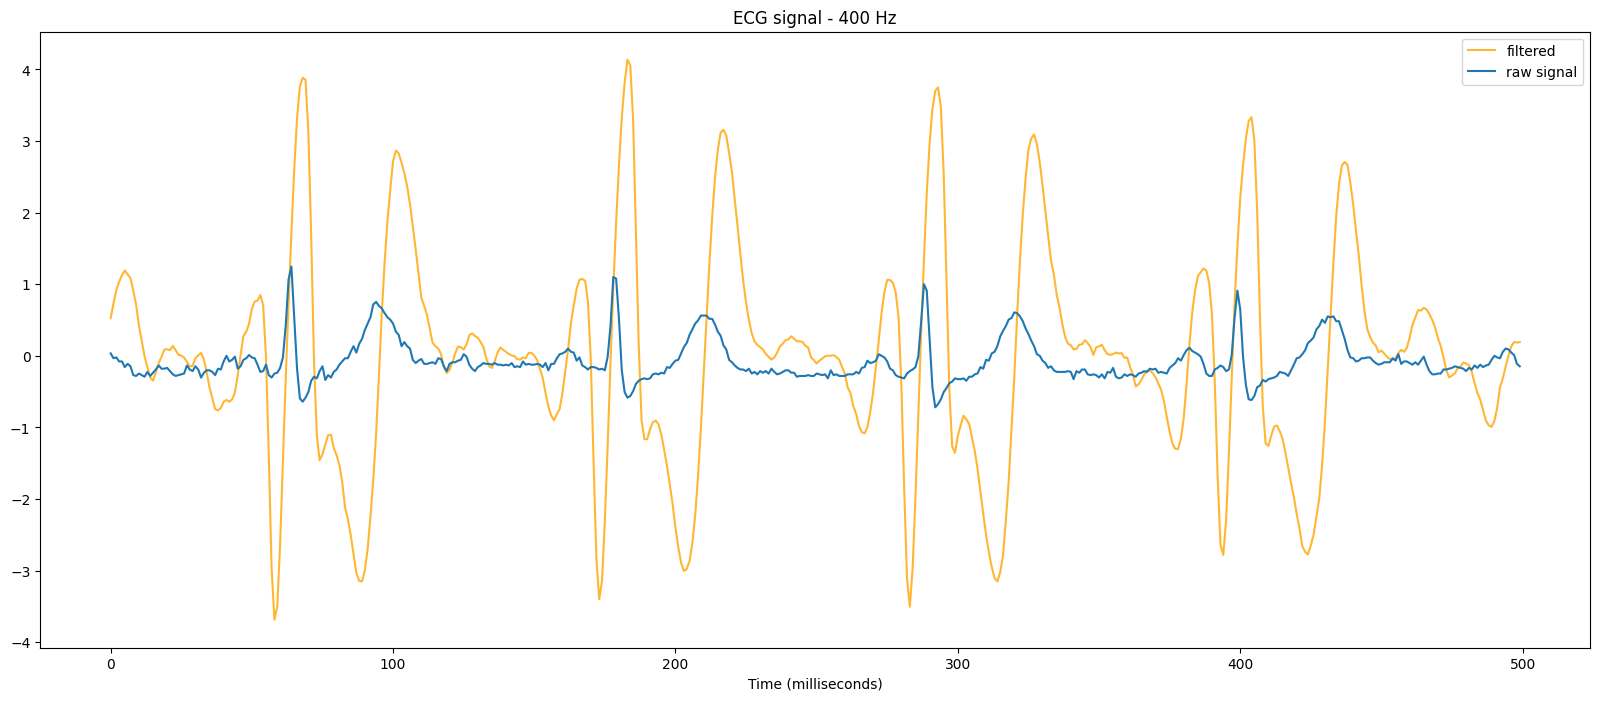

In [8]:
# linear spaced vector between 0.5 pi and 1.5 pi
v = np.linspace(0.5 * np.pi, 1.5 * np.pi, 15)

# create sine filter for approximating QRS feature
peak_filter = np.sin(v)

# compute cross correlation between ecg and the sine filter
x_transformed = np.correlate(x_10_seconds, peak_filter, mode="same")

# and plot the raw + filtered signal
plt.figure(figsize=(20,8))
plt.title('ECG signal - 400 Hz')
plt.plot(x_transformed, alpha = 0.8, c='orange')
plt.plot(x_10_seconds, alpha = 1)
plt.gca().legend(('filtered','raw signal'))
plt.xlabel('Time (milliseconds)')
plt.show()

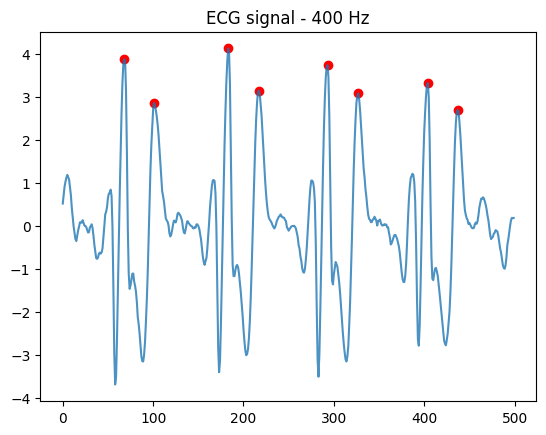

In [37]:

rr_peaks, _ = find_peaks(x_transformed, distance=20)
plt.plot(x_transformed, alpha = 0.8)

indices = set(np.where(scipy.stats.zscore(x_transformed) > 1)[0])
rr_peaks = np.array([x for x in rr_peaks if (x in indices)])

plt.scatter(rr_peaks, x_transformed[rr_peaks], color='red')

plt.title("ECG signal - 400 Hz")
plt.show()

In [27]:
sec = np.mean(np.diff(rr_peaks)) / record.fs
print(f"Heart rate = {round(60 / sec)}")

Heart rate = 146


----------------------------------------------------------------

In [ ]:


# record_name = '/content/drive/MyDrive/Colab Notebooks/ecg_files/21'


# # Open ECG file
# patient_record = wfdb.rdrecord(record_name)

# # Extract patient info, lead names, and ECG data
# patient_number = patient_record.record_name
# leads = patient_record.sig_name
# ecg_data = patient_record.p_signal

# # Extract the first lead (assuming only one lead for simplicity)
# x = ecg_data[:, 1]

# # Define a Butterworth low-pass filter
# def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff_freq / nyquist
#     b, a = butter(order, normal_cutoff, btype='high', analog=False)
#     y = lfilter(b, a, data)
#     return y

# # Set the cutoff frequency for the low-pass filter
# cutoff_frequency = 50.0  # Adjust as needed

# # Apply the Butterworth low-pass filter
# x_filtered = butter_lowpass_filter(x, cutoff_frequency, patient_record.fs)

# # Plot the original and filtered signals for the first 10 seconds
# num_samples_per_10_seconds = int(100 * patient_record.fs)
# x_10_seconds = x[:num_samples_per_10_seconds]
# x_filtered_10_seconds = x_filtered[:num_samples_per_10_seconds]

# plt.figure(figsize=(20, 8))
# plt.title('Original and Filtered ECG Signal - 400 Hz (First 10 Seconds)')
# plt.plot(x_10_seconds, alpha=1, label='Original Signal')
# plt.plot(x_filtered_10_seconds, alpha=0.8, label='Filtered Signal')
# plt.xlabel('Time (milliseconds)')
# plt.ylim(-5, 5)  # Set y-axis limits
# plt.legend()
# plt.show()

# # Find peaks in the filtered signal for the first 10 seconds
# rr_peaks, _ = find_peaks(x_filtered_10_seconds, distance=20)

# # Plot the filtered signal with identified peaks for the first 10 seconds
# plt.plot(x_filtered_10_seconds, alpha=0.8)
# indices = set(np.where(scipy.stats.zscore(x_filtered_10_seconds) > 3)[0])
# rr_peaks = np.array([x for x in rr_peaks if x in indices])
# plt.scatter(rr_peaks, x_filtered_10_seconds[rr_peaks], color='red')

# plt.title("Filtered ECG Signal - 400 Hz with Identified Peaks (First 10 Seconds)")
# plt.ylim(-5, 5)  # Set y-axis limits
# plt.show()

# # Display record information
# display(patient_record.__dict__)
